In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
# read dataset
df_raw = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# make a copy of the original source file
df = df_raw.copy()

print("Size of dataset is: {}".format(df.shape))
df.head()


Size of dataset is: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Checking the Null Values

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

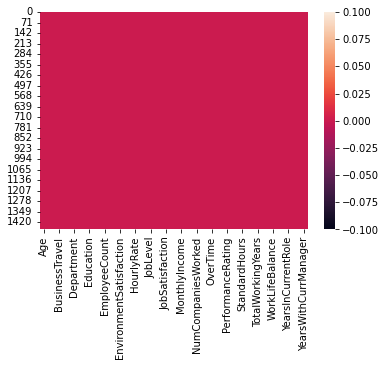

In [7]:
sns.heatmap(df.isnull())

In [8]:
# groupby column data types
df.columns.groupby(df.dtypes)


{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [9]:
# number of columns
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[0], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[0]])))
print("No of columns for {} is {}.".format(list(df.columns.groupby(df.dtypes).keys())[1], len(df.columns.groupby(df.dtypes)[list(df.columns.groupby(df.dtypes).keys())[1]])))


No of columns for int64 is 26.
No of columns for object is 9.


# summary statistics


In [10]:
# summary statistics
df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
# summary statistics
df.describe(include="all")


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


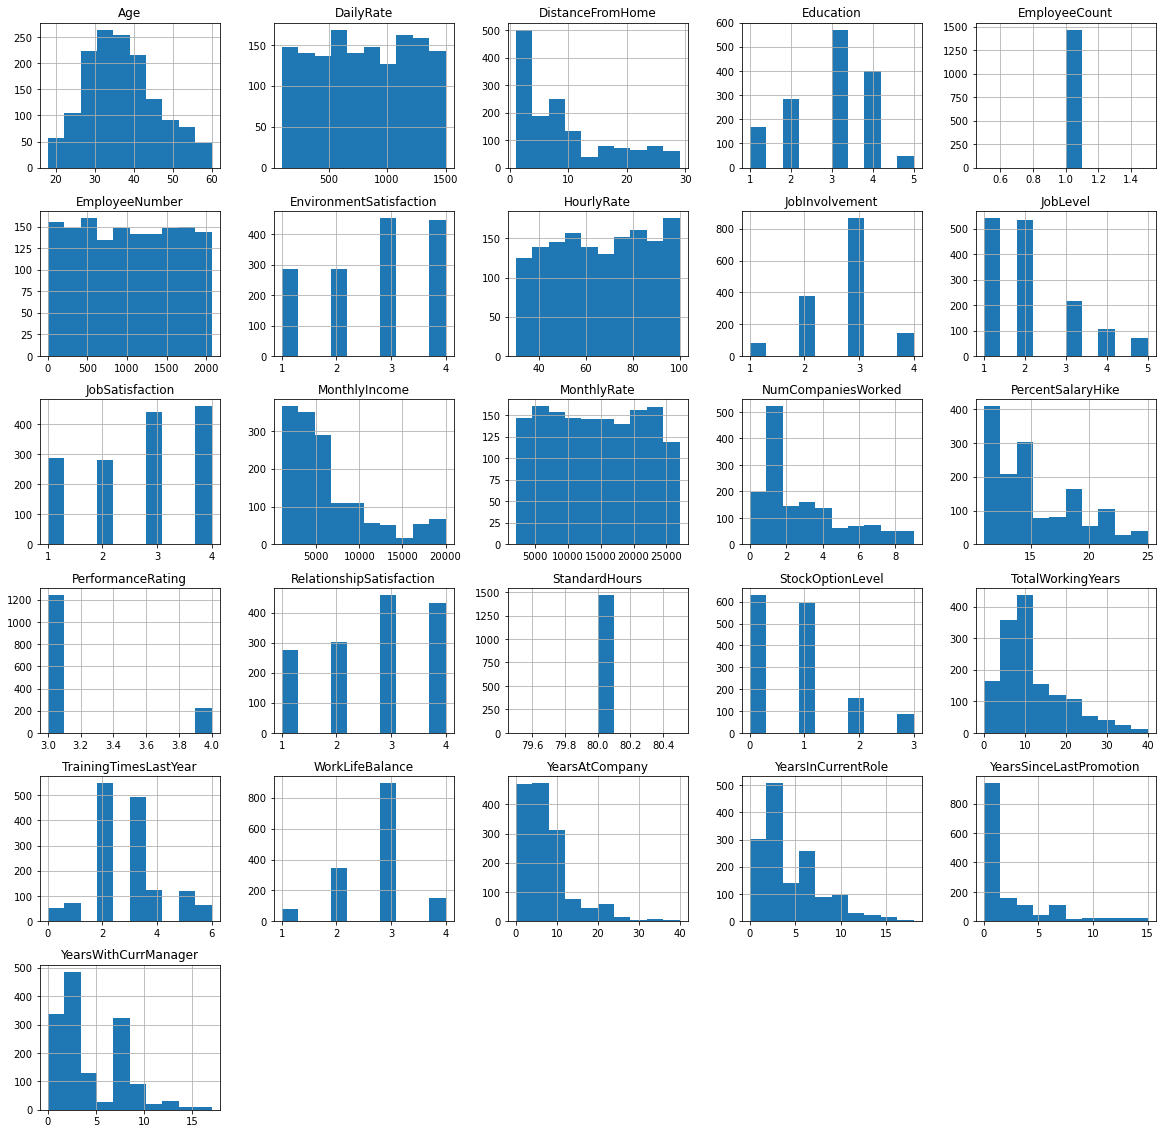

In [12]:
# plot histogram for numeric columns
df.hist(figsize=(20,20))
# plt.savefig("histograms.png", bbox_inches="tight")
plt.show()


# Features / Input Variables


In [13]:
# Age
print("Age of employees is from {} to {} years old.".format(df['Age'].min(), df['Age'].max()))


Age of employees is from 18 to 60 years old.


In [14]:
# Ex-Employees
print("Ex-Employees:")
print("Average Age of Ex-Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'Age'])))


Ex-Employees:
Average Age of Ex-Employees = 33.6
Standard Deviation = 9.7


In [15]:
# Active Employees
print("Active Employees:")
print("Average Age of Active Employees = {:1.1f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'Age'])))
print("Standard Deviation = {:1.1f}".format(np.std(df.loc[df['Attrition'] == 'No', 'Age'])))


Active Employees:
Average Age of Active Employees = 37.6
Standard Deviation = 8.9


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


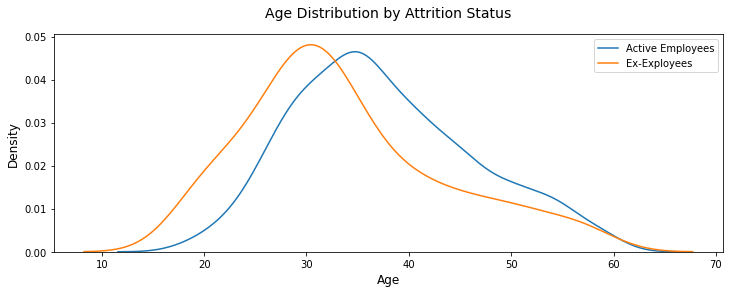

In [16]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["Age"]], hist=False, label="Active Employees")
sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


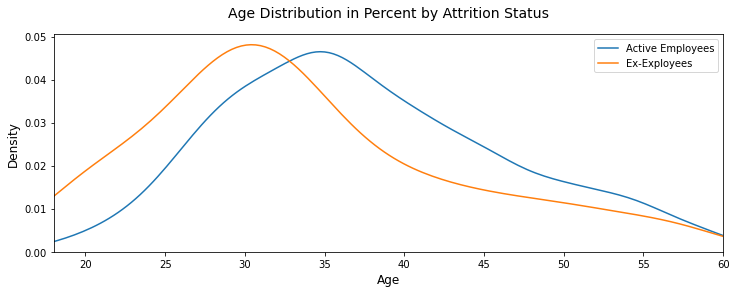

In [17]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["Age"]], hist=False, label="Active Employees")
sns.distplot(target_1[["Age"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlim(df["Age"].min(), df["Age"].max())
plt.xlabel("Age", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Age Distribution in Percent by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=14)

# plt.savefig("age_kde.png", bbox_inches="tight")
plt.show()


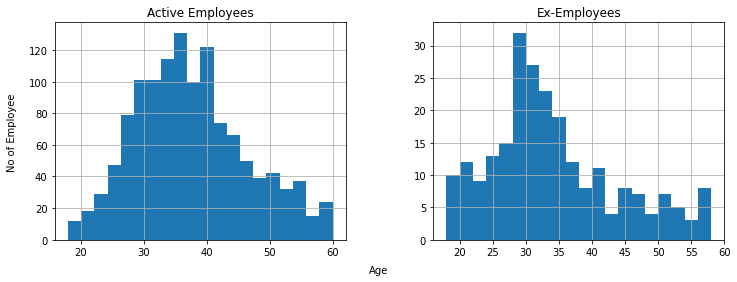

In [18]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['Age']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['Age']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Age', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("age_hist.png", bbox_inches="tight")
plt.show()


In [19]:
# Gender of employees
df['Gender'].value_counts()


Male      882
Female    588
Name: Gender, dtype: int64

In [20]:
# Gender of employees
df['Gender'].value_counts(normalize=True)


Male      0.6
Female    0.4
Name: Gender, dtype: float64

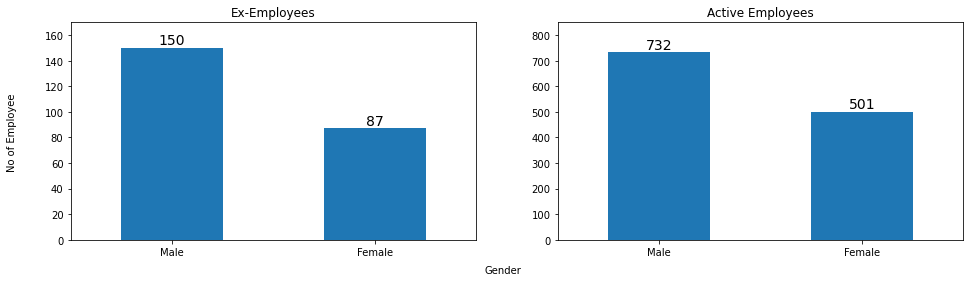

In [21]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+15, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_1.png", bbox_inches="tight")
plt.show()


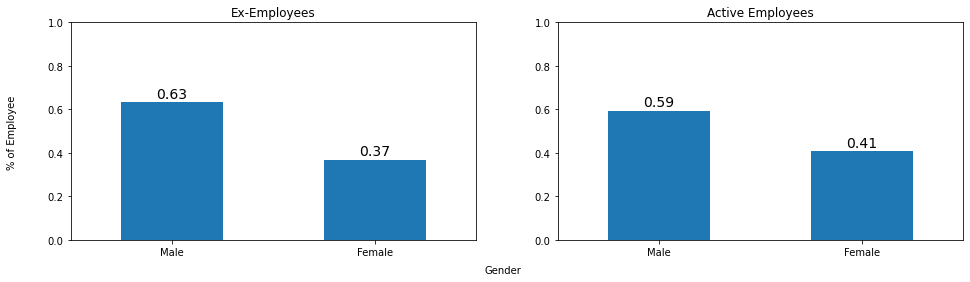

In [22]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Attrition'] == 'Yes', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Gender'].value_counts(normalize=True).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Gender', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_2.png", bbox_inches="tight")
plt.show()


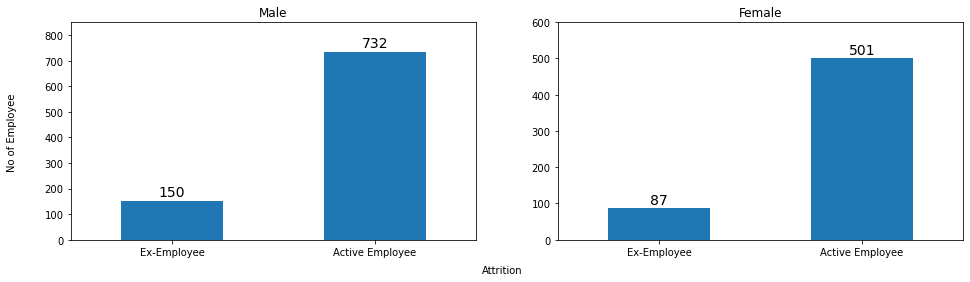

In [23]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,850)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_3.png", bbox_inches="tight")
plt.show()


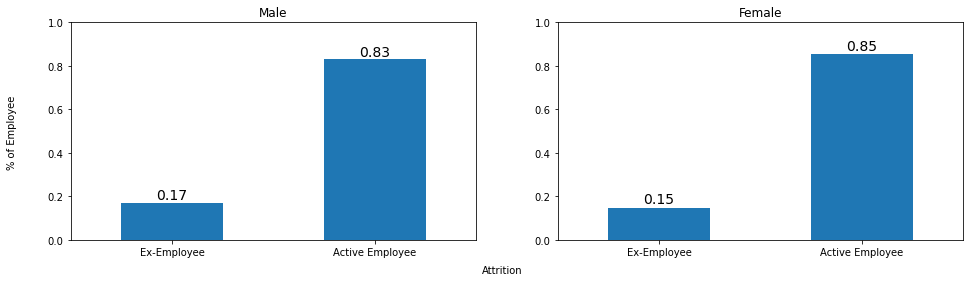

In [24]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df['Gender'] == 'Male', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Male', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.015, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Gender'] == 'Female', 'Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Female', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
fig.text(0.5, 0.01, 'Attrition', ha='center')
fig.text(0.07, 0.5, '% of Employee', va='center', rotation='vertical')

# plt.savefig("gender_hist_4.png", bbox_inches="tight")
plt.show()


In [25]:
# marital Status of employees
df['MaritalStatus'].value_counts()


Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [26]:
# marital Status of employees
df['MaritalStatus'].value_counts(normalize=True)


Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64

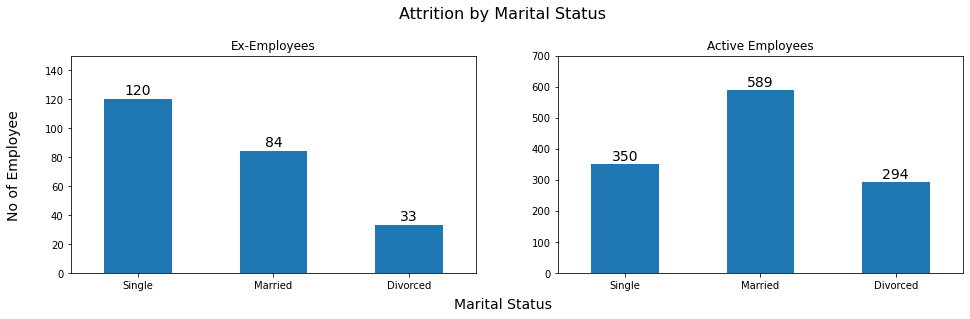

In [27]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'MaritalStatus'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'MaritalStatus'].value_counts().reindex(["Single", "Married","Divorced"]).plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition by Marital Status', x=0.5, y=1.05, ha='center', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("marital_hist_1.png", bbox_inches="tight")
plt.show()


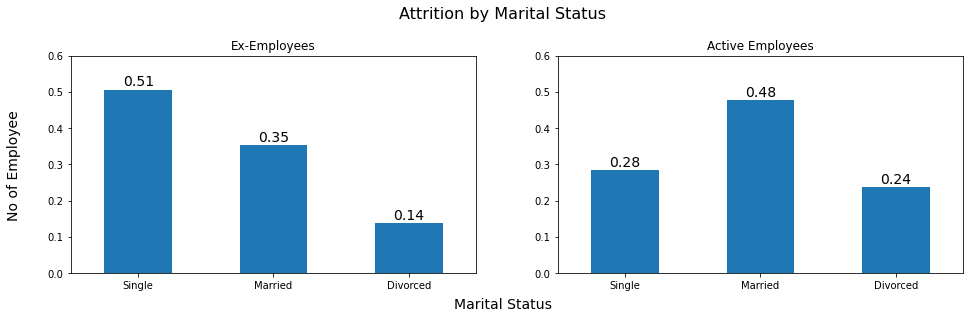

In [28]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "MaritalStatus"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "MaritalStatus"].value_counts(normalize=True).reindex(["Single", "Married","Divorced"]).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,0.6)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition by Marital Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_2.png", bbox_inches="tight")
plt.show()


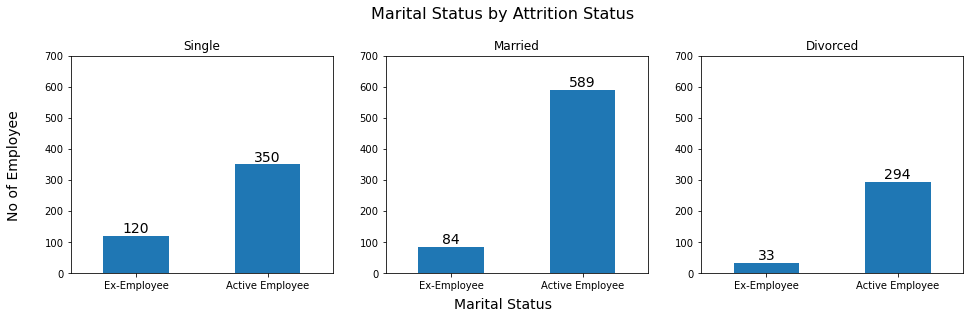

In [29]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,700)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_3.png", bbox_inches="tight")
plt.show()


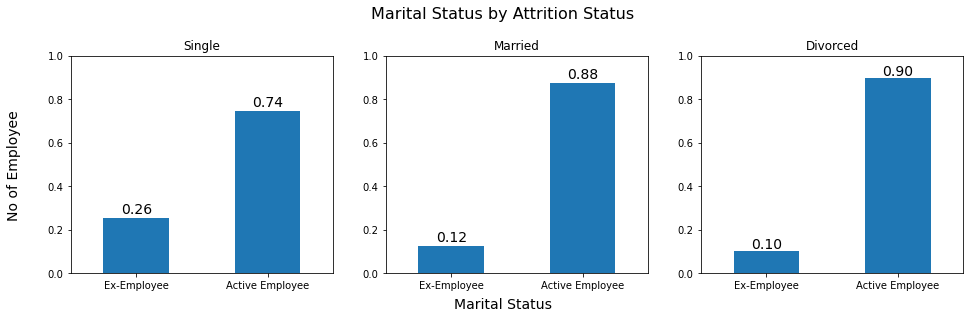

In [30]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['MaritalStatus'] == 'Single', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Single', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['MaritalStatus'] == 'Married', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Married', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.02, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['MaritalStatus'] == 'Divorced', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Divorced', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Marital Status by Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("marital_hist_4.png", bbox_inches="tight")
plt.show()


In [31]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df['DistanceFromHome'].min(), df['DistanceFromHome'].max()))


Distance from home for employees to get to work is from 1 to 29 miles.


In [32]:
# Ex-Employees
print("Ex-Employees:")
print("Average Distance From Home of Ex-Employees = {:1.2f} miles".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'DistanceFromHome'])))


Ex-Employees:
Average Distance From Home of Ex-Employees = 10.63 miles
Standard Deviation = 8.43


In [33]:
# Active Employees
print("Active Employees:")
print("Average Distance From Home of Active Employees = {:1.2f} miles".format(np.mean(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'DistanceFromHome'])))


Active Employees:
Average Distance From Home of Active Employees = 8.92 miles
Standard Deviation = 8.01


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


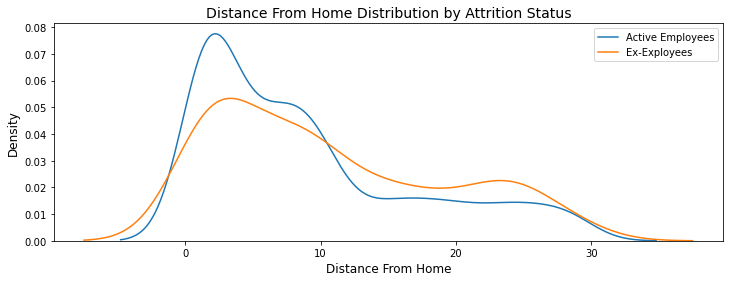

In [34]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["DistanceFromHome"]], hist=False, label="Active Employees")
sns.distplot(target_1[["DistanceFromHome"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distance From Home Distribution by Attrition Status", fontsize=14)

# plt.savefig("distance_kde.png", bbox_inches="tight")
plt.show()


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


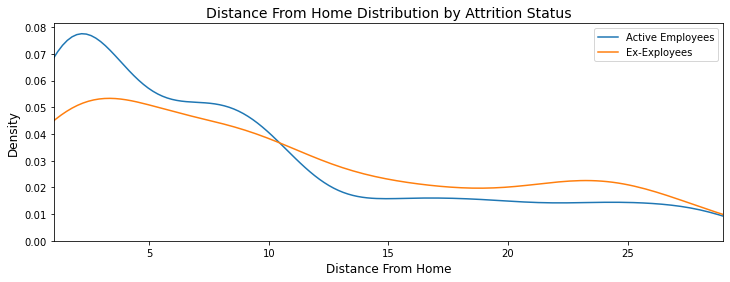

In [35]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["DistanceFromHome"]], hist=False, label="Active Employees")
sns.distplot(target_1[["DistanceFromHome"]], hist=False, label="Ex-Exployees")
plt.legend()
plt.xlim(df["DistanceFromHome"].min(), df["DistanceFromHome"].max())
plt.xlabel("Distance From Home", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distance From Home Distribution by Attrition Status", fontsize=14)

# plt.savefig("distance_kde.png", bbox_inches="tight")
plt.show()


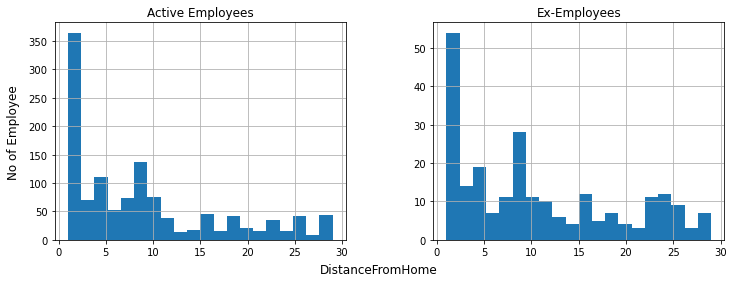

In [36]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['DistanceFromHome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['DistanceFromHome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'DistanceFromHome', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("distance_hist.png", bbox_inches="tight")
plt.show()


In [37]:
# departments
df['Department'].value_counts()


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [38]:
# departments
df['Department'].value_counts(normalize=True)


Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64

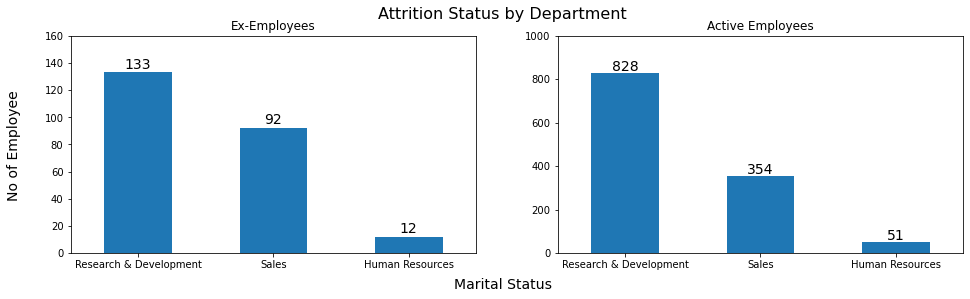

In [39]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'Department'].value_counts().plot.bar(title= 'Ex-Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,160)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'Department'].value_counts().plot.bar(title= 'Active Employees', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Department', fontsize=16)
fig.text(0.5, 0.001, 'Marital Status', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("dept_hist_1.png", bbox_inches="tight")
plt.show()


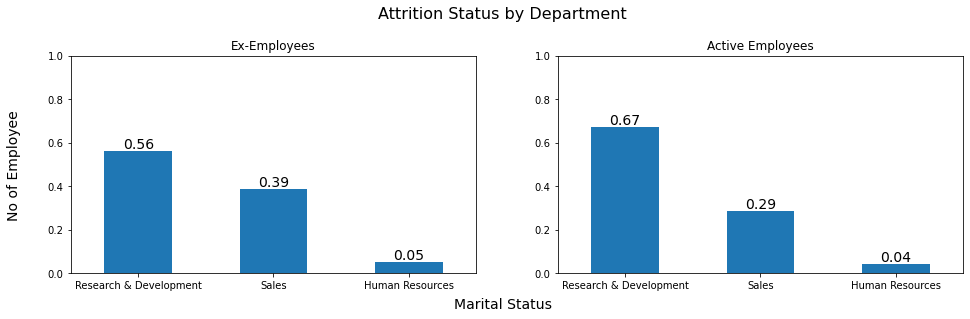

In [40]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df.loc[df["Attrition"] == "Yes", "Department"].value_counts(normalize=True).plot.bar(title= "Ex-Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df["Attrition"] == "No", "Department"].value_counts(normalize=True).plot.bar(title= "Active Employees", color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Marital Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("dept_hist_2.png", bbox_inches="tight")
plt.show()


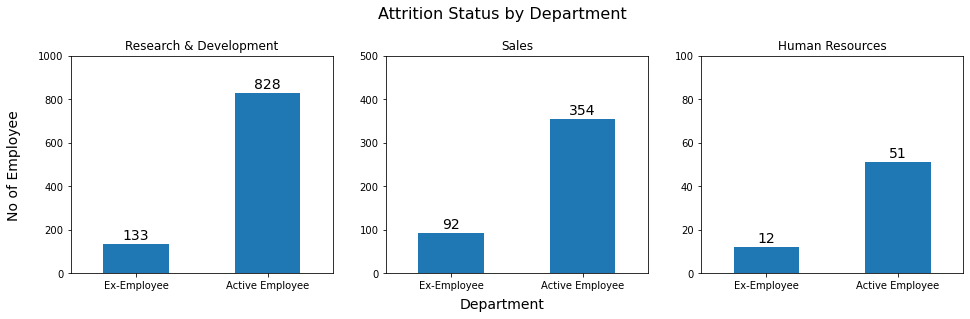

In [41]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['Department'] == 'Research & Development', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Research & Development', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['Department'] == 'Sales', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Sales', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,500)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['Department'] == 'Human Resources', 'Attrition'].value_counts().sort_values(ascending=True).plot.bar(title= 'Human Resources', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,100)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+2, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Department", ha="center", fontsize=14)
fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("sdept_hist_3.png", bbox_inches="tight")
plt.show()


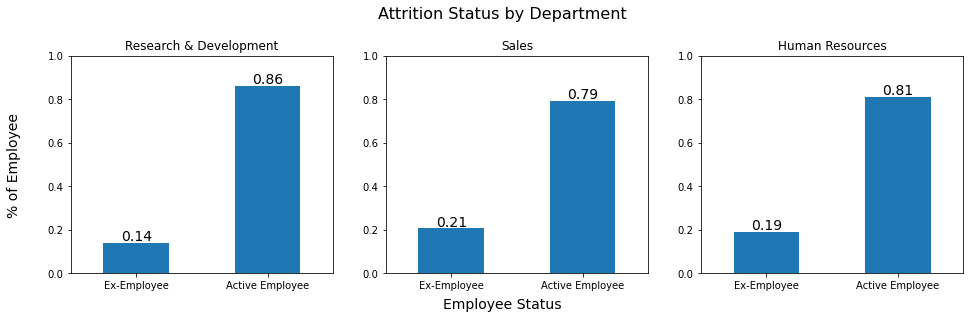

In [42]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(131)
g1 = df.loc[df['Department'] == 'Research & Development', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Research & Development', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(132)
g2 = df.loc[df['Department'] == 'Sales', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Sales', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(133)
g3 = df.loc[df['Department'] == 'Human Resources', 'Attrition'].value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'Human Resources', color="#1f77b4")
g3.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g3.patches:
    height = p.get_height()
    g3.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status by Department", x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, "Employee Status", ha="center", fontsize=14)
fig.text(0.07, 0.5, "% of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("dept_hist_4.png", bbox_inches="tight")
plt.show()


In [43]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts()


Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [44]:
# Employees in the database have several roles on-file
df['JobRole'].value_counts(normalize=True)


Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64

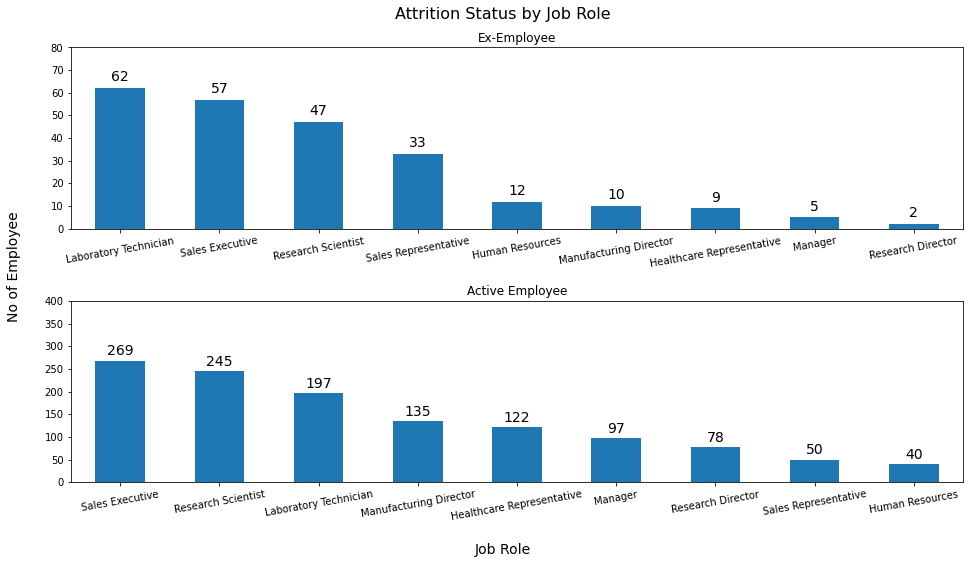

In [45]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,80)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)

plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts().plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("role_hist_1.png", bbox_inches="tight")
plt.show()


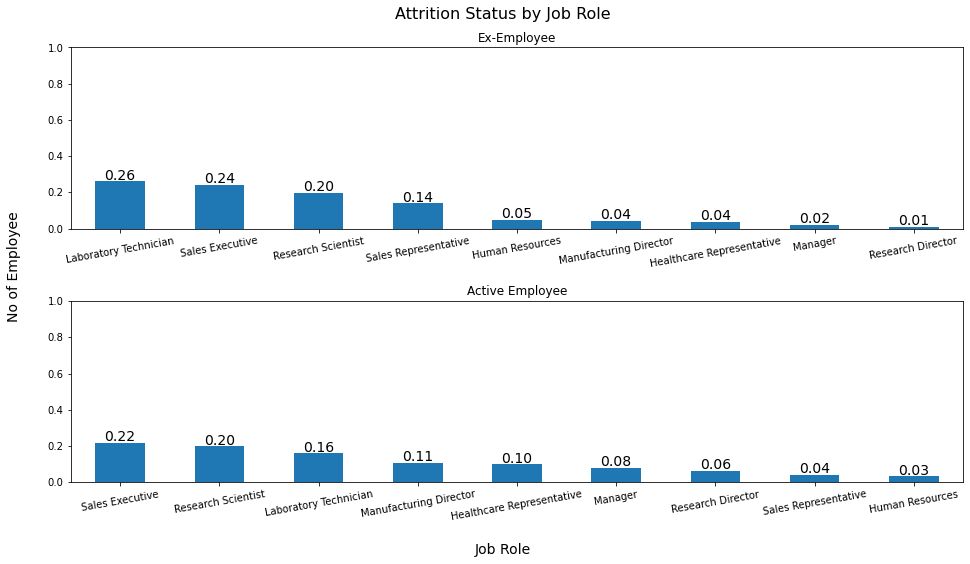

In [46]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(211)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobRole'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(212)
g2 = df.loc[df['Attrition'] == 'No', 'JobRole'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=10)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

fig.subplots_adjust(hspace=0.4)

# set title and axis labels
plt.suptitle('Attrition Status by Job Role', x=0.5, y=0.95, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Role', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("role_hist_2.png", bbox_inches="tight")
plt.show()


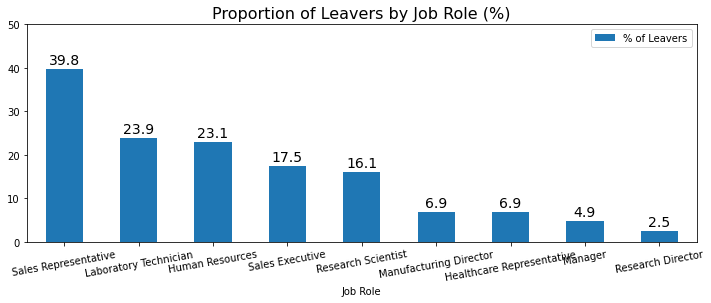

In [47]:
df_JobRole = pd.DataFrame(columns=["Job Role", "% of Leavers"])
i=0
for field in list(df['JobRole'].unique()):
    ratio = df[(df['JobRole']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobRole']==field].shape[0]
    df_JobRole.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JR = df_JobRole.groupby(by="Job Role").sum()
g = df_JR.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Role (%)",  fontsize=16)
plt.xticks(rotation=10)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("role_hist_3.png", bbox_inches="tight")
plt.show()


In [48]:
# breakdown by job level
df['JobLevel'].value_counts()


1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [49]:
# breakdown by job level
df['JobLevel'].value_counts(normalize=True)


1    0.369388
2    0.363265
3    0.148299
4    0.072109
5    0.046939
Name: JobLevel, dtype: float64

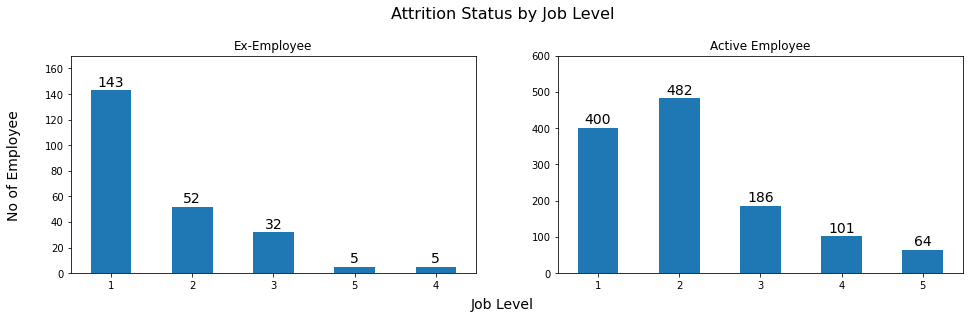

In [50]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobLevel'].value_counts().reindex([1,2,3,4,5]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,600)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Level', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("level_hist_1.png", bbox_inches="tight")
plt.show()


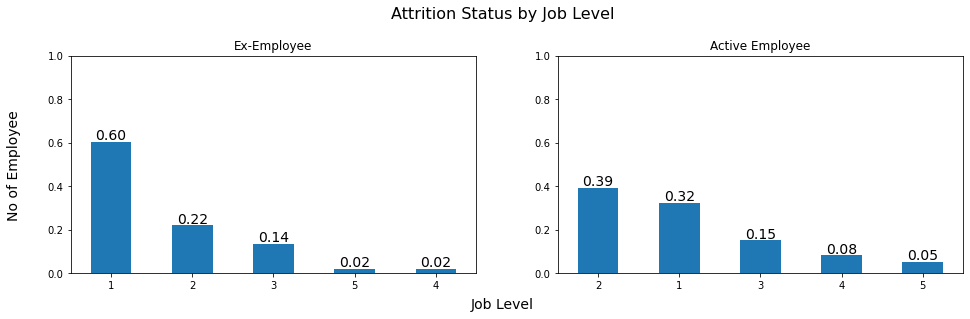

In [51]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'JobLevel'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'JobLevel'].value_counts(normalize=True).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by Job Level', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("level_hist_2.png", bbox_inches="tight")
plt.show()


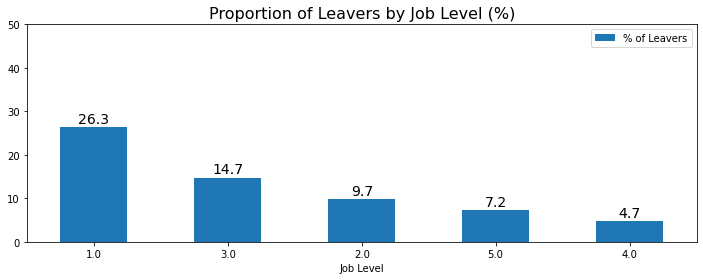

In [52]:
df_JobLevel = pd.DataFrame(columns=["Job Level", "% of Leavers"])
i=0
for field in list(df['JobLevel'].unique()):
    ratio = df[(df['JobLevel']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['JobLevel']==field].shape[0]
    df_JobLevel.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_JL = df_JobLevel.groupby(by="Job Level").sum()
g = df_JL.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by Job Level (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("level_hist_3.png", bbox_inches="tight")
plt.show()


In [53]:
# Distance from Home
print("Years At Company for employees is from {} to {} years.".format(df['YearsAtCompany'].min(), df['YearsAtCompany'].max()))


Years At Company for employees is from 0 to 40 years.


In [54]:
# Ex-Employees
print("Ex-Employees:")
print("Average Years At Company of Ex-Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'])))


Ex-Employees:
Average Years At Company of Ex-Employees = 5.13 years
Standard Deviation = 5.94


In [55]:
# Active Employees
print("Active Employees:")
print("Average Years At Company of Active Employees = {:1.2f} years".format(np.mean(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'])))
print("Standard Deviation = {:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'])))


Active Employees:
Average Years At Company of Active Employees = 7.37 years
Standard Deviation = 6.09


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


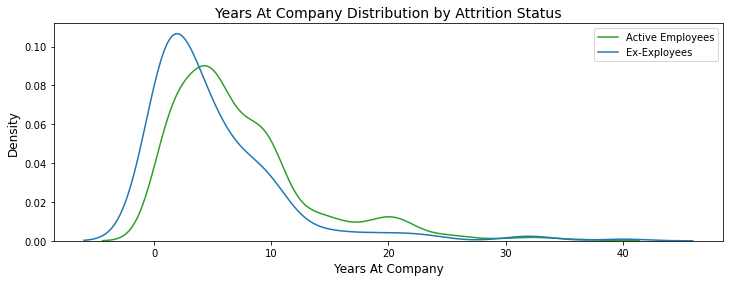

In [56]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["YearsAtCompany"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["YearsAtCompany"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlabel("Years At Company", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years At Company Distribution by Attrition Status", fontsize=14)

# plt.savefig("year_kde_1.png", bbox_inches="tight")
plt.show()


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


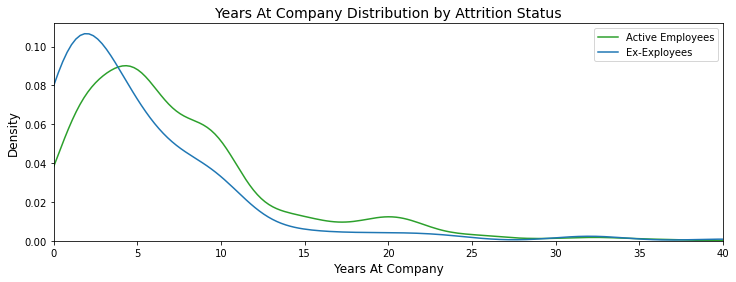

In [57]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["YearsAtCompany"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["YearsAtCompany"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlim(df["YearsAtCompany"].min(), df["YearsAtCompany"].max())
plt.xlabel("Years At Company", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Years At Company Distribution by Attrition Status", fontsize=14)

# plt.savefig("year_kde_2.png", bbox_inches="tight")
plt.show()


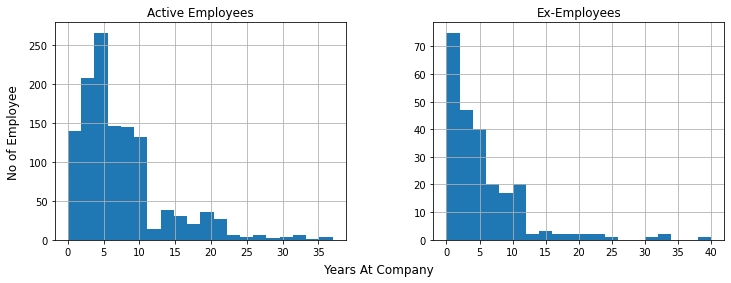

In [58]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['YearsAtCompany']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['YearsAtCompany']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Years At Company', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("year_hist.png"", bbox_inches="tight")
plt.show()


In [60]:
# breakdown by overtime
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [61]:
# breakdown by overtime
df['OverTime'].value_counts(normalize=True)


No     0.717007
Yes    0.282993
Name: OverTime, dtype: float64

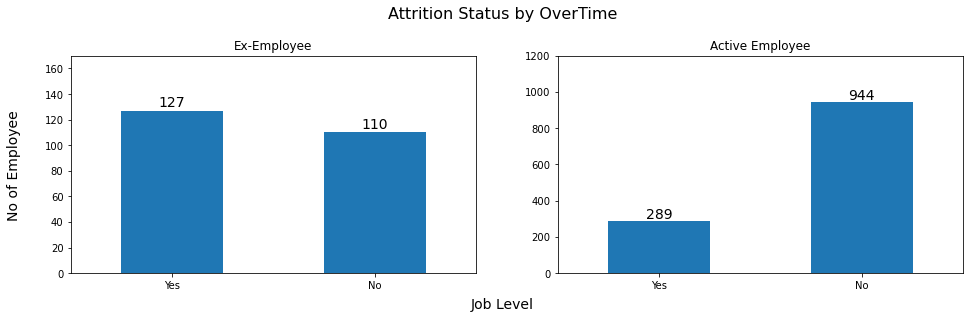

In [62]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts().plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,170)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts().reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1200)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("ot_hist_1.png", bbox_inches="tight")
plt.show()

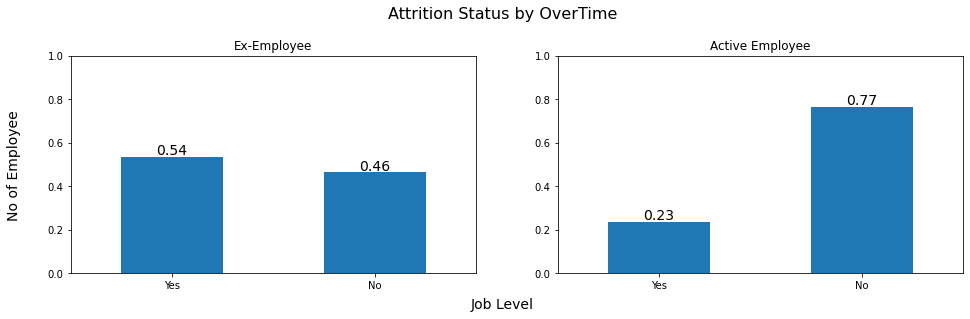

In [63]:
fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g2 = df.loc[df['Attrition'] == 'Yes', 'OverTime'].value_counts(normalize=True).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df.loc[df['Attrition'] == 'No', 'OverTime'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Attrition Status by OverTime', x=0.5, y=1.05, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("ot_hist_2.png", bbox_inches="tight")
plt.show()


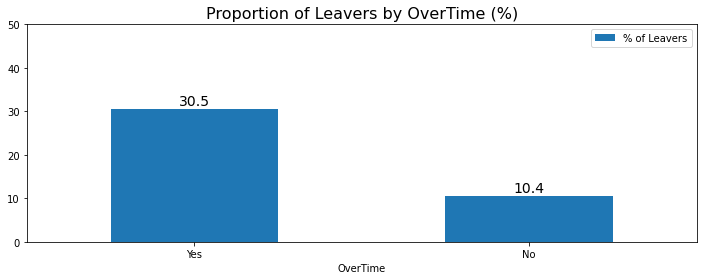

In [64]:
df_OverTime = pd.DataFrame(columns=["OverTime", "% of Leavers"])
i=0
for field in list(df['OverTime'].unique()):
    ratio = df[(df['OverTime']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['OverTime']==field].shape[0]
    df_OverTime.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_OT = df_OverTime.groupby(by="OverTime").sum()
g = df_OT.sort_values(by=['% of Leavers'], ascending=False).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by OverTime (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("ot_hist_3.png", bbox_inches="tight")
plt.show()

In [65]:
# breakdown by Work-Life Balance
df['WorkLifeBalance'].value_counts()


3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [66]:
# breakdown by Work-Life Balance
df['WorkLifeBalance'].value_counts(normalize=True)


3    0.607483
2    0.234014
4    0.104082
1    0.054422
Name: WorkLifeBalance, dtype: float64

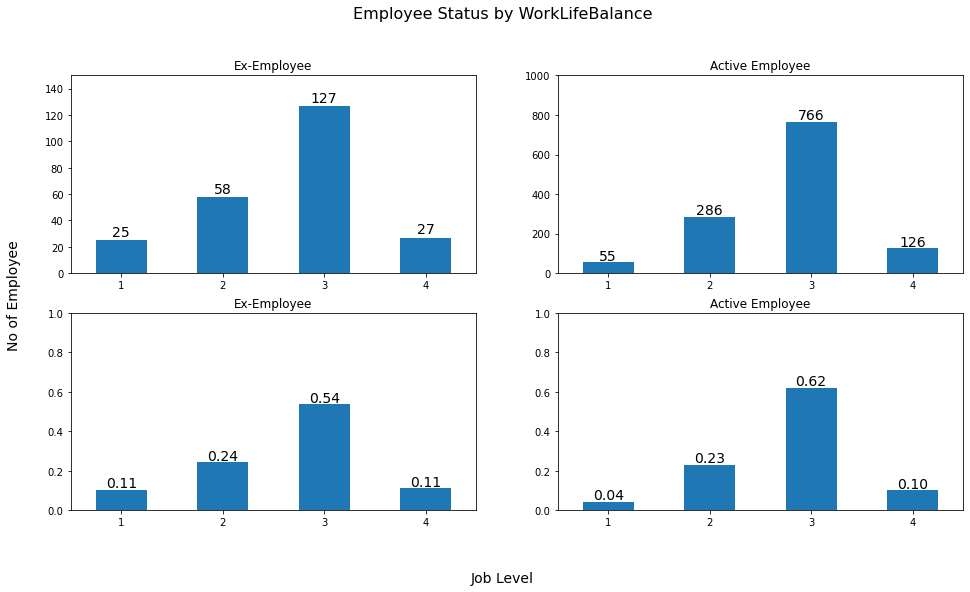

In [67]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g2 = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,150)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+3, "{:1.0f}".format(height), ha="center", fontsize=14) 

plt.subplot(222)
g2 = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].value_counts().reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1000)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+12, "{:1.0f}".format(height), ha="center", fontsize=14) 


plt.subplot(223)
g2 = df.loc[df['Attrition'] == 'Yes', 'WorkLifeBalance'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Ex-Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(224)
g2 = df.loc[df['Attrition'] == 'No', 'WorkLifeBalance'].value_counts(normalize=True).reindex([1,2,3,4]).plot.bar(title= 'Active Employee', color="#1f77b4")
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

# set title and axis labels
plt.suptitle('Employee Status by WorkLifeBalance', x=0.5, y=1, ha="center", fontsize=16)
fig.text(0.5, 0.001, 'Job Level', ha='center', fontsize=14)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("wlb_hist_1.png", bbox_inches="tight")
plt.show()


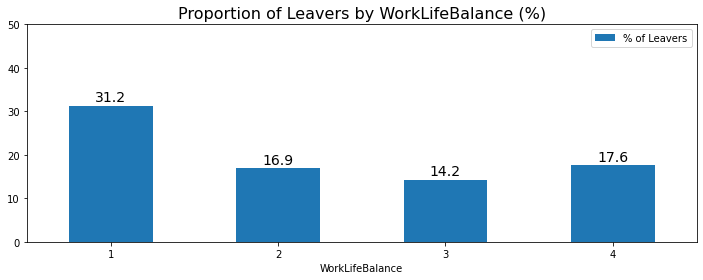

In [69]:
df_WorkLifeBalance = pd.DataFrame(columns=["WorkLifeBalance", "% of Leavers"])
i=0
for field in list(df['WorkLifeBalance'].unique()):
    ratio = df[(df['WorkLifeBalance']==field)&(df['Attrition']=="Yes")].shape[0] / df[df['WorkLifeBalance']==field].shape[0]
    df_WorkLifeBalance.loc[i] = (field, ratio*100)
    i += 1
    #print("In {}, the ratio of leavers is {:.2f}%".format(field, ratio*100))    
df_WLB = df_WorkLifeBalance.groupby(by="WorkLifeBalance").sum()
g = df_WLB.sort_values(by=['% of Leavers'], ascending=False).reindex([1,2,3,4]).plot(kind='bar', figsize=(12,4))
plt.ylim(0,50)
plt.title("Proportion of Leavers by WorkLifeBalance (%)",  fontsize=16)
plt.xticks(rotation=0)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height+1, "{:1.1f}".format(height), ha="center", fontsize=14) 

# plt.savefig("wlb_hist_2.png", bbox_inches="tight")
plt.show()


In [70]:
# Monthly Income
print("Monthly Income for employees is from ${} to ${}.".format(df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))


Monthly Income for employees is from $1009 to $19999.


In [71]:
# Ex-Employees
print("Ex-Employees:")
print("Average Monthly Income of Ex-Employees = ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))
print("Standard Deviation = ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'])))


Ex-Employees:
Average Monthly Income of Ex-Employees = $4787.09
Standard Deviation = $3632.52


In [72]:
# Active Employees
print("Active Employees:")
print("Average Monthly Income of Active Employees = ${:1.2f}".format(np.mean(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))
print("Standard Deviation = ${:1.2f}".format(np.std(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'])))


Active Employees:
Average Monthly Income of Active Employees = $6832.74
Standard Deviation = $4816.25


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


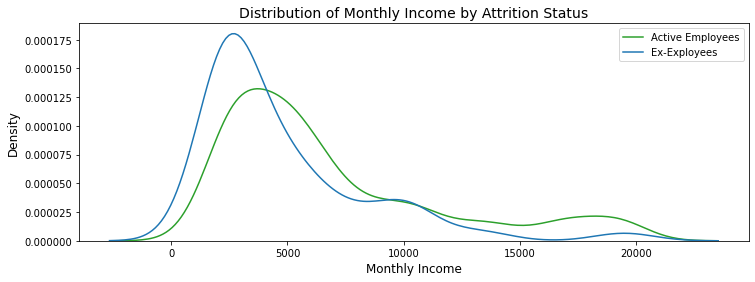

In [73]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["MonthlyIncome"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["MonthlyIncome"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)

# plt.savefig("income_kde_1.png", bbox_inches="tight")
plt.show()


C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


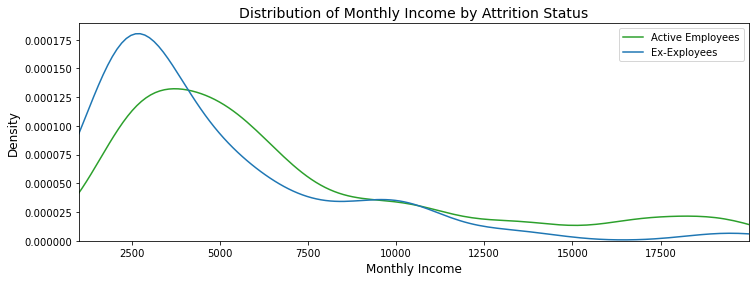

In [74]:
# kernel density estimation (KDE) plot 

plt.subplots(figsize=(12,4))

target_0 = df.loc[df["Attrition"] == "No"]
target_1 = df.loc[df["Attrition"] == "Yes"]

sns.distplot(target_0[["MonthlyIncome"]], hist=False, label="Active Employees", color="#2ca02c")
sns.distplot(target_1[["MonthlyIncome"]], hist=False, label="Ex-Exployees", color="#1f77b4")
plt.legend()
plt.xlim(df["MonthlyIncome"].min(), df["MonthlyIncome"].max())
plt.xlabel("Monthly Income", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Monthly Income by Attrition Status", fontsize=14)

# plt.savefig("income_kde_2.png", bbox_inches="tight")
plt.show()


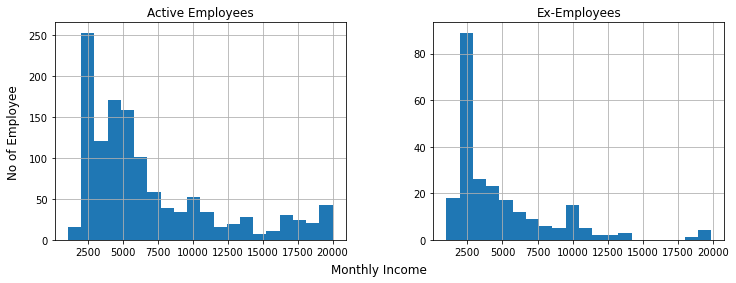

In [75]:
# plot histogram
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12,4)

target_0[['MonthlyIncome']].hist(bins=20, ax=axes[0])
axes[0].set_title('Active Employees')

target_1[['MonthlyIncome']].hist(bins=20, ax=axes[1])
axes[1].set_title('Ex-Employees')

fig.text(0.5, 0.01, 'Monthly Income', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=12)

# plt.savefig("income_hist.png", bbox_inches="tight")
plt.show()


In [77]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [78]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df['Attrition'].value_counts(normalize=True)


No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

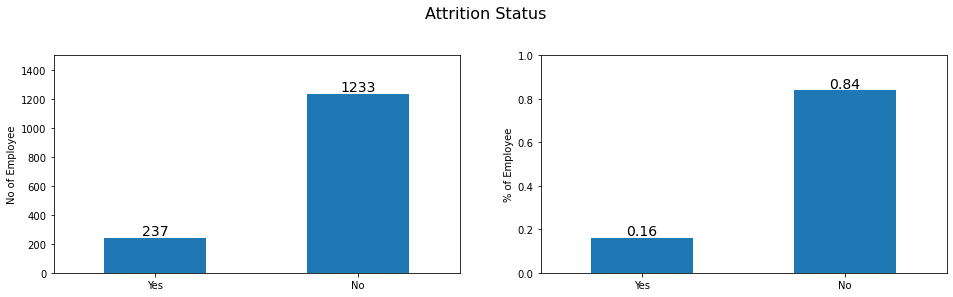

In [79]:
# df['Attrition'].value_counts().plot(kind='hist', xTitle='Attrition', yTitle='count', title='Attrition Distribution')

fig, axes = plt.subplots(figsize=(16,4))

plt.subplot(121)
g1 = df['Attrition'].value_counts().reindex(["Yes", "No"]).plot.bar(color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("No of Employee")
plt.ylim(0,1500)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(122)
g2 = df['Attrition'].value_counts(normalize=True).reindex(["Yes", "No"]).plot.bar( color="#1f77b4")
plt.xticks(rotation=0)
plt.ylabel("% of Employee")
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
# set title and axis labels
plt.suptitle("Attrition Status", x=0.5, y=1.05, ha="center", fontsize=16)
# fig.text(0.5, 0.001, 'Attrition Status', ha='center', fontsize=14)
# fig.text(0.07, 0.5, 'No of Employee', va='center', rotation='vertical', fontsize=14)

# plt.savefig("att_hist_1.png", bbox_inches="tight")
plt.show()


# Correlation

In [80]:
# Find correlations with the target and sort
df_corr = df.copy()
df_corr['Target'] = df_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_corr = df_corr.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
correlations = df_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))


Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


In [81]:
corr = df_corr.corr()
corr


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


C:\Users\pooja\AppData\Local\Temp/ipykernel_10808/3503553206.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


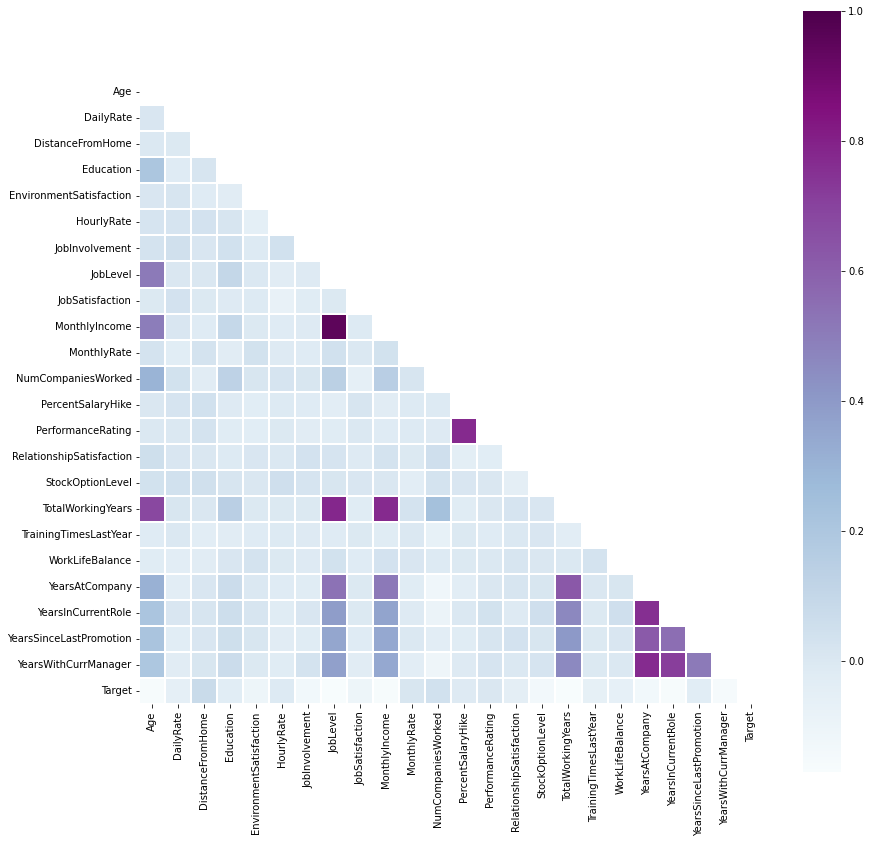

In [82]:
# set figure size
plt.figure(figsize=(14, 14))

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = sns.heatmap(corr, vmax=1, square=True, cmap="BuPu", linewidths=.1, annot=False, mask=mask)

# fig.get_figure().savefig("corr_heatmap.png", bbox_inches="tight") 
plt.show()


# Encoding

In [83]:
print(df.shape)
df.head()


(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [84]:
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#  reate a label encoder object
le = LabelEncoder()


In [85]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df.columns:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))


4 columns were label encoded.


In [86]:
print(df.shape)
df.head()


(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [87]:
# convert rest of categorical variable into dummy
df = pd.get_dummies(df)


In [88]:
print(df.shape)
df.head()


(1470, 54)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


# Splitting data into training and testing sets


In [90]:
# assign the target to a new dataframe and convert it to a numerical type
y = df['Attrition']
print(type(y))
y[:5]


<class 'pandas.core.series.Series'>


0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [91]:
# remove the target and redundant features from the dataset
X = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
print(X.shape)
X.head()


(1470, 49)


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,0,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,1,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,1,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,0,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)  


In [94]:
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)


Shape of X_train dataset:  (1102, 49)
Shape of y_train dataset:  (1102,)
Shape of X_test dataset:  (368, 49)
Shape of y_test dataset:  (368,)


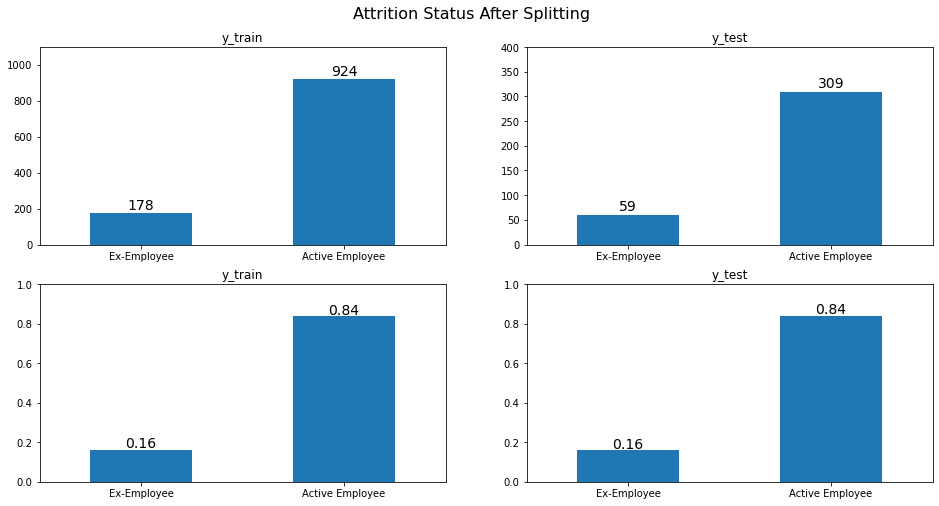

In [95]:
fig, axes = plt.subplots(figsize=(16,8))

plt.subplot(221)
g1 = y_train.value_counts().sort_values(ascending=True).plot.bar(title= 'y_train', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1100)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+20, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(222)
g2 = y_test.value_counts().sort_values(ascending=True).plot.bar(title= 'y_test', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,400)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+10, "{:1.0f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(223)
g1 = y_train.value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'y_train', color="#1f77b4")
g1.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 
    
plt.subplot(224)
g2 = y_test.value_counts(normalize=True).sort_values(ascending=True).plot.bar(title= 'y_test', color="#1f77b4")
g2.set_xticklabels(["Ex-Employee", "Active Employee"])
plt.xticks(rotation=0)
plt.ylim(0,1)
for p in g2.patches:
    height = p.get_height()
    g2.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.2f}".format(height), ha="center", fontsize=14) 

    
# set title and axis labels
plt.suptitle("Attrition Status After Splitting", x=0.5, y=0.95, ha="center", fontsize=16)
# fig.text(0.5, 0.001, "Attrition", ha="center", fontsize=14)
# fig.text(0.07, 0.5, "No of Employee", va="center", rotation="vertical", fontsize=14)

# plt.savefig("split_hist.png", bbox_inches="tight")
plt.show()


# Feature Scaling


In [97]:
# import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# define the scaler 
scaler = MinMaxScaler(feature_range=(0, 1))
# fit the scaler on the TRAINING data and use the scaler to transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# use the scaler to transform the TEST data
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
X_train_scaled
print(X_test_scaled.shape)
X_test_scaled



(1102, 49)
(368, 49)


array([[0.35714286, 0.69649248, 0.07142857, ..., 1.        , 0.        ,
        0.        ],
       [0.61904762, 0.71224052, 0.32142857, ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.9305655 , 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.11904762, 0.31424481, 0.03571429, ..., 1.        , 0.        ,
        0.        ],
       [0.30952381, 0.84037223, 0.03571429, ..., 1.        , 0.        ,
        0.        ],
       [0.9047619 , 0.57551897, 0.17857143, ..., 0.        , 1.        ,
        0.        ]])

In [100]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

import sklearn
print(sklearn.__version__)


0.24.2


In [102]:
# selection of algorithms to consider and set performance measure
models = []
models.append(("Logistic Regression", LogisticRegression(solver="liblinear", random_state=0)))
models.append(("Random Forest", RandomForestClassifier(n_estimators=100, random_state=0)))
models.append(("SVM", SVC(gamma="auto", random_state=0)))
models.append(("KNN", KNeighborsClassifier()))
models.append(("Decision Tree Classifier", DecisionTreeClassifier(random_state=0)))
models.append(("Gaussian NB", GaussianNB()))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=0)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=0)))


In [104]:
%%time
# evaluate each model in turn and provide accuracy and standard deviation scores

acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
df_results = pd.DataFrame(columns=col)
i = 0

# evaluate each model using cross-validation
for name, model in models:
    # 10-fold cross-validation
    kfold = KFold(n_splits=10)  

    # accuracy scoring
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="accuracy")

    # roc_auc scoring
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1


Wall time: 14.5 s


In [105]:
# sort the results by Accuracy
df_results.sort_values(by=["Accuracy Mean"], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.41,6.06,87.30,2.85
7,AdaBoost,80.43,9.26,86.48,2.19
1,Random Forest,79.10,5.65,85.85,4.26
6,Gradient Boosting,79.09,8.08,85.67,2.57
2,SVM,50.00,0.00,83.85,4.05
3,KNN,55.58,9.66,81.41,4.04
4,Decision Tree Classifier,58.03,8.14,78.41,2.55
5,Gaussian NB,76.07,7.65,77.85,5.71


In [106]:
# sort the results by ROC AUC
df_results.sort_values(by=["ROC AUC Mean"], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,81.41,6.06,87.30,2.85
7,AdaBoost,80.43,9.26,86.48,2.19
1,Random Forest,79.10,5.65,85.85,4.26
6,Gradient Boosting,79.09,8.08,85.67,2.57
5,Gaussian NB,76.07,7.65,77.85,5.71
4,Decision Tree Classifier,58.03,8.14,78.41,2.55
3,KNN,55.58,9.66,81.41,4.04
2,SVM,50.00,0.00,83.85,4.05


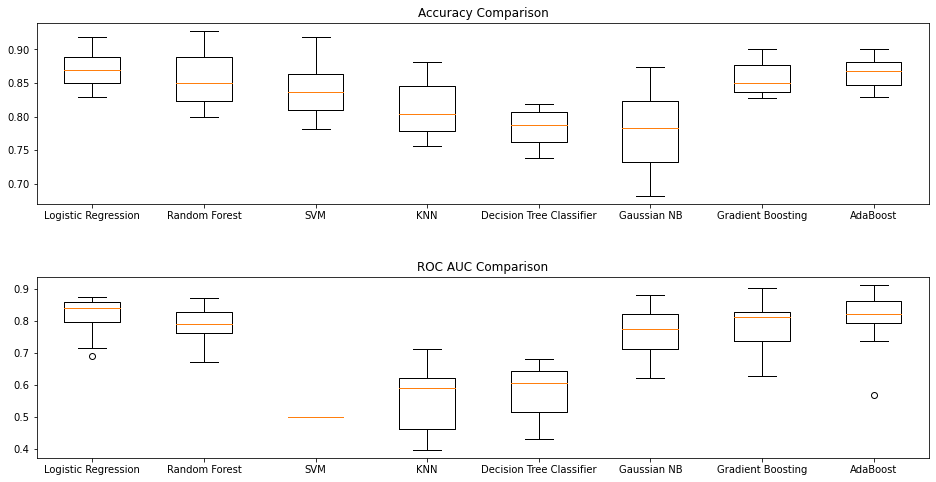

In [107]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(211)
plt.boxplot(acc_results)
ax1.set_xticklabels(names)
plt.title("Accuracy Comparison")

fig.subplots_adjust(hspace=0.4)

ax2 = fig.add_subplot(212)
plt.boxplot(auc_results)
ax2.set_xticklabels(names)
plt.title("ROC AUC Comparison")

# plt.savefig("boxplots.png", bbox_inches="tight")
plt.show()


# Logistic Regression


In [110]:
kfold = KFold(n_splits=10)
modelCV = LogisticRegression(solver='liblinear')
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))


[0.86208791 0.79001976 0.83914729 0.68982456 0.86088818 0.8164794
 0.84002976 0.85403509 0.71507151 0.87367021] 

Average AUC score = 0.8141; standard deviation = 0.0606


# Fine-tuning


In [122]:
log_gs = LogisticRegression()

log_gs.fit(X_train, y_train)


y_pred = log_gs.predict(X_test)

logit_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Logistic Regression Classifier on Test set: {:.2f}%'.format(logit_accuracy*100))


Accuracy of Logistic Regression Classifier on Test set: 84.51%


C:\Users\pooja\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [123]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.84      1.00      0.92       309
           1       1.00      0.03      0.07        59

    accuracy                           0.85       368
   macro avg       0.92      0.52      0.49       368
weighted avg       0.87      0.85      0.78       368



In [124]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = log_gs.predict_proba(X_test)[:, 1]
logit_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on Test set: {}".format(logit_roc_auc))


AUC on Test set: 0.7193790795897098


[[309   0]
 [ 57   2]]


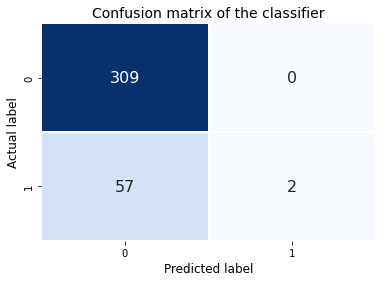

In [125]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of the classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("log_cm.png", bbox_inches="tight")
plt.show()


# Random Forest Classifier


In [127]:
kfold = KFold(n_splits=10)
modelCV = RandomForestClassifier(n_estimators=100,)
scoring = 'roc_auc'
results = cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print(results, "\n")
print("Average AUC score = {:1.4f}; standard deviation = {:1.4f}".format(results.mean(), results.std()))


[0.86428571 0.74036561 0.7565407  0.71192982 0.91492777 0.80631354
 0.81063988 0.76315789 0.72882288 0.8543883 ] 

Average AUC score = 0.7951; standard deviation = 0.0631


In [128]:
%%time
rf_classifier = RandomForestClassifier(random_state=0)

param_grid = {"n_estimators": [150, 200, 250],
              "min_samples_split":[2,4,6],
              "min_samples_leaf": [1, 2],
#               "max_depth": [5, 10, 15, 20, 25],
              "class_weight": ["balanced", None]}

grid_obj = GridSearchCV(rf_classifier,
                        param_grid=param_grid,
                        scoring="roc_auc",
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print("="*20)
print("best estimator: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print("best score:", grid_obj.best_score_)
print("="*20)


best estimator: RandomForestClassifier(min_samples_split=4, n_estimators=150, random_state=0)
best params: {'class_weight': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
best score: 0.808213477069182
Wall time: 2min 7s


In [129]:
# get feature importances
importances = grid_obj.best_estimator_.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(X_train.columns)):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)


,Feature,Coefficient
0,MonthlyIncome,0.081481
1,Age,0.059403
2,OverTime,0.058700
3,DailyRate,0.054744
4,MonthlyRate,0.048324
5,TotalWorkingYears,0.046841
6,DistanceFromHome,0.044263
7,HourlyRate,0.041748
8,YearsAtCompany,0.040452
9,NumCompaniesWorked,0.033069


In [130]:
# make predictions
y_pred = grid_obj.predict(X_test)
# calculate accuracy score
rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest Classifier on Test set: {:.2f}%'.format(rf_accuracy*100))
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)



Accuracy of Random Forest Classifier on Test set: 85.05%
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       309
           1       0.83      0.08      0.15        59

    accuracy                           0.85       368
   macro avg       0.84      0.54      0.54       368
weighted avg       0.85      0.85      0.80       368



In [131]:
# calculate AUC score using test dataset
# we will only keep probabilities associated with the employee leaving
y_pred_prob = grid_obj.predict_proba(X_test)[:, 1]
rf_roc_auc = roc_auc_score(y_test, y_pred_prob)

print("AUC on Test set: {}".format(rf_roc_auc))


AUC on Test set: 0.8053864297076408


[[308   1]
 [ 54   5]]


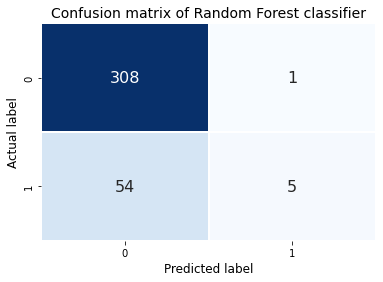

In [132]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
print(cm)

# fig, ax = plt.subplots()
# ax.xaxis.set_label_position("top")

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt="d", cbar=False, linewidths=0.1, cmap="Blues")
plt.title('Confusion matrix of Random Forest classifier', fontsize=14)
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# plt.savefig("rf_cm.png", bbox_inches="tight")
plt.show()


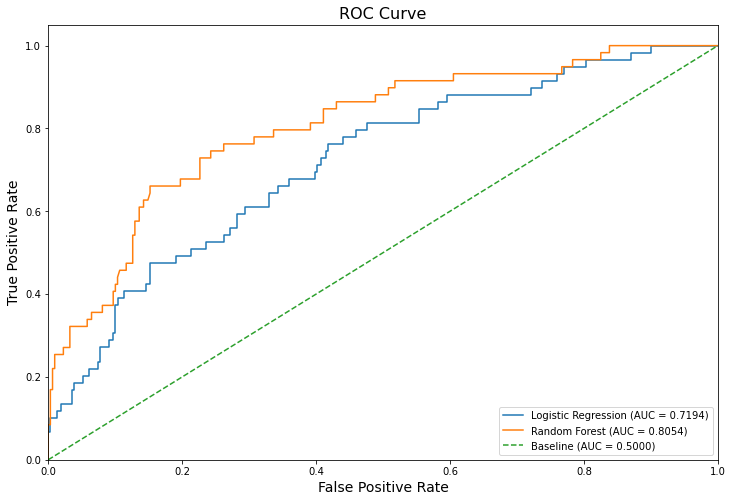

In [134]:
# create ROC curves
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_gs.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, grid_obj.predict_proba(X_test)[:,1])
plt.figure(figsize=(12, 8))

# plot Logistic Regression ROC
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:1.4f})".format(logit_roc_auc))
# plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label="Random Forest (AUC = {:1.4f})".format(rf_roc_auc))
# plot Baseline ROC
plt.plot([0,1], [0,1],label="Baseline (AUC = 0.5000)", linestyle="--")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend(loc="lower right")
# plt.savefig("roc.png", bbox_inches="tight")
plt.show()


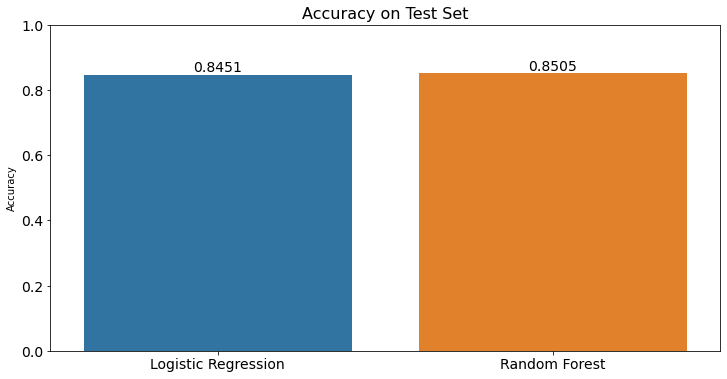

In [135]:
# combine all models' results into one dataframe
data = {"Model": [ "Logistic Regression", "Random Forest"], 
        "Accuracy": [ logit_accuracy, rf_accuracy]}

results = pd.DataFrame(data=data)
results


plt.figure(figsize=(12, 6))

plt.title("Accuracy on Test Set", fontsize=16)
g1 = sns.barplot(x="Model", y="Accuracy", data=results)
plt.ylim(0, 1)
g1.set_xlabel("")
g1.tick_params(labelsize=14)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2., height+0.01, "{:1.4f}".format(height), ha="center", fontsize=14) 
    
# plt.savefig("acc_results.png", bbox_inches="tight")
plt.show()


# saving the model

In [136]:
import joblib
joblib.dump(grid_obj,"HrEmployee.pkl")


['HrEmployee.pkl']